In [145]:
% matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import random as r
import operator as o

r.seed(0)

In [142]:
#MODEL PARAMETERS

#VERTEX WEIGHTS SAMPLED FROM THIS DISTRIBUTION
weights = [x for x in range(10)]

#POSSIBLE NUMBER OF NEIGHBORS
pos_nhbr = [0, 1, 2]

#
threshold = 20




In [163]:
def list_str_conv(X):
    if type(X) == str and len(X)>0:  
        return list( map(int, X.split(",")) )
    else:
        raise Exception('bad')

def dg():
    return list(g[ g['status'] =='digraph'  ].index)
    
def add_v(g):
    digraph = dg()
    v = len(g)
    w = r.choice(weights)
    num_nhbr = r.choice(pos_nhbr)
    
    g.loc[v] = [v, 'digraph', v, w, w, str(v) ]
    
    #done if no neighbors.
    if num_nhbr==0:
        return
    
    #collect neighbors in string
    j = 0
    c_list = [v]
    
    for n in range(  num_nhbr  ): 
        i = r.choice(digraph) 
        j+=1
        if j ==1:
            not_v = i
        c_list.append(i)
   
    g.set_value(v, 'root', g.loc[not_v]['root'] ) 
    
    # we go to every neighbor of v, take their component
    # make a big union of all components of neighbors of v
    new_comp = g.ix[c_list, 'comp'].str.cat(sep=',')
    new_comp = list_str_conv(new_comp) 
    
    # convert list of int to list of strs, then take only the unique ones
    new_comp =   list( set(   list(map(str, new_comp))     )        )
    # convert it back to str so we may record it in our table
    c_str = ','.join(new_comp)
    
    #convert it back to list so we may do table look-up
    new_comp = list_str_conv(c_str)
    
    # update components and component weights
    w += g.loc[not_v]['sum_weight']
    g.ix[new_comp, 'sum_weight'] = w
    g.ix[new_comp, 'comp'] = c_str
    
    #if (g['sum_weight'] > threshold).any():
    g.ix[ g.sum_weight >threshold, 'status'] = 'gp'


# initialize w/ 1 vertex
g = pd.DataFrame(columns=['v', 'status', 'root',  'weight', 'sum_weight', 'comp'] )
ini_weight = r.choice(weights)
g.loc[0] = [0, 'digraph', 0, ini_weight, ini_weight, '0']    


#e.g. we track value of largest component, see plots below
stat_to_track1 = []

#we track number of GPs
stat_to_track2 = []

for i in range(100):
    add_v(g)
    stat_to_track.append(g['sum_weight'].max() )
    stat_to_track2.append(  (g['status'] == 'gp').sum()  )
g.head()

,v,status,root,weight,sum_weight,comp
0,0.0,gp,0.0,5.0,27.0,"1,0,4,6,7"
1,1.0,gp,0.0,9.0,27.0,"1,0,4,6,7"
2,2.0,gp,2.0,4.0,24.0,"13,8,18,2,10,15,16,19"
3,3.0,gp,3.0,7.0,22.0,"5,9,3"
4,4.0,gp,4.0,4.0,27.0,"1,0,4,6,7"


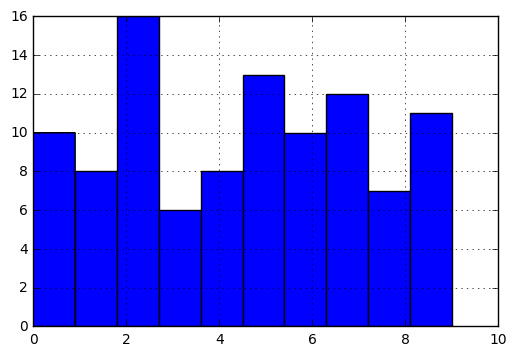

In [164]:
#distribution of vertex weights in the graph, we should expect ~10 vertices for 10 values 0 to 9. 
g['weight'].hist()

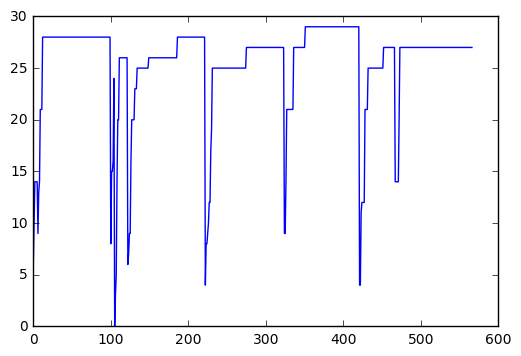

In [165]:
#this is largest component value in the graph as vertices are added
#i don't get why it oscillates, it should plateau...

plt.plot(range(len(stat_to_track)) , stat_to_track  )

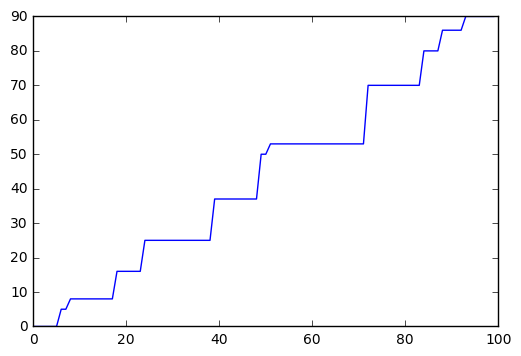

In [166]:
#LOOK MA, NUMBER OF GATEKEEPERS ROUGHLY LINEAR W/ SIZE

plt.plot(range(len(stat_to_track2)) , stat_to_track2  )